# 1. Choose an API

## a) Choose an API and briefly describe the type of data you can obtain from it. 
### The API I am choosing is the Metropolitan Museum of Art Collection API. The Met API contains select datasets of information on more than 470,000 artworks in its collection. 

## b) Provide a link to the API documentation
### https://metmuseum.github.io/

## c) the base URL of the API you intend to use.
### https://collectionapi.metmuseum.org/public/collection/v1/search

# 2. Authentication

## a) Briefly explain how the API authenticates the user. 
### The MET API does not require API users to register or obtain an API key to use the service. 

## b) Apply for an API key if necessary and provide the information (with relevant URL) how that can be done. Do not include the API key in the assignment submission.
### No Need :)

# 3. Send a Simple GET Request

In [211]:
### Executing GET request to obtain a small amount of data from the API. 
import requests
url = 'https://collectionapi.metmuseum.org/public/collection/v1/search'
param1 = {"q": "moon", "medium": "Paintings"}

r = requests.get(url, params = param1)

In [212]:
### Check and show the status of the request
r.status_code

200

In [213]:
### Check and show the type of response
r.headers.get('Content-Type')

'application/json; charset=UTF-8'

# 4. Parse the response and Create a dataset


In [298]:
### 4a) Saving Object IDs to a list

met_json = r.json()
print(type(met_json))
print(met_json.keys())

###saving object ids in variable
objectids= met_json['objectIDs']
print(objectids[-1])

<class 'dict'>
dict_keys(['total', 'objectIDs'])
40511


In [216]:
### 4b) Creating a dataset using API. Using the Object IDs from search to pull all open access data about that object

url_object = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/{id}'
dataset = []

for ids in objectids:
    parameters = {'objectID': ids} 
    objectidsearch = requests.get(url_object.format(id = ids), params = parameters)
    dataset.append(objectidsearch.json())

In [219]:
### creating dataframe from data collected through API

import pandas as pd

df = pd.DataFrame(dataset)
print(df.head())

   objectID isHighlight accessionNumber accessionYear isPublicDomain  \
0  490081.0       False         2015.56          2015          False   
1   78452.0       False        2013.232          2013          False   
2  438417.0        True         2000.51          2000           True   
3  752049.0        True        2017.388          2017          False   
4  437326.0        True         24.45.1          1924           True   

                                        primaryImage  \
0                                                      
1                                                      
2  https://images.metmuseum.org/CRDImages/ep/orig...   
3                                                      
4  https://images.metmuseum.org/CRDImages/ep/orig...   

                                   primaryImageSmall additionalImages  \
0                                                                  []   
1                                                                  []   
2  https://

In [269]:
### creating more specific dataframe
df2 = df[['objectID', 'title','department', 'artistDisplayName', 'artistNationality', 'artistGender', 'objectDate']]
print(df2.head())

   objectID                                     title  \
0  490081.0                                  Untitled   
1   78452.0                            Lotus and Carp   
2  438417.0            Two Men Contemplating the Moon   
3  752049.0                              Fly the Wild   
4  437326.0  Blind Orion Searching for the Rising Sun   

                    department       artistDisplayName artistNationality  \
0  Modern and Contemporary Art             Laura Owens          American   
1                    Asian Art         Song Yeong-bang            Korean   
2           European Paintings  Caspar David Friedrich            German   
3  Modern and Contemporary Art         Stanley Whitney          American   
4           European Paintings         Nicolas Poussin            French   

  artistGender   objectDate  
0       Female         1996  
1                      1990  
2               ca. 1825–30  
3                      2017  
4                      1658  


<AxesSubplot:>

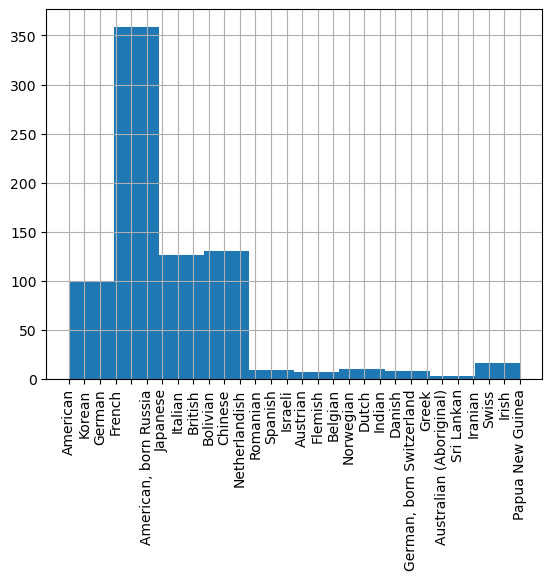

In [270]:
### Summary Statistics of data
df2['artistNationality'].hist(xrot=90)

### Based on my histogram, of all the paintings that are about the moon, the majority of artists that create these
### works have French, Unknown, or American, born Russian nationalities at over 350 contributions per each nationality


In [293]:
### Summary Statistics of data 2
### Seeing how many paintings that are related to moons were created are modern (1860-present)
import re
df2['timeperiod']=['modern'if re.search(r'\s*\b((18[6-9]\d)|19|20)+', str(date)) else "not modern" for date in df.loc[:,'objectDate']]

### saving data frame as csv file
df2.to_csv('data.csv')

/var/folders/rn/3kc6r6fd7_g4r4j7c0sz26nh0000gn/T/ipykernel_12289/3401474335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timeperiod']=['modern'if re.search(r'\s*\b((18[6-9]\d)|19|20)+', str(date)) else "not modern" for date in df.loc[:,'objectDate']]


<AxesSubplot:>

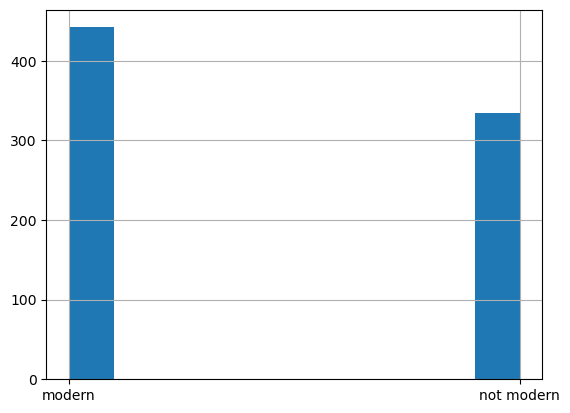

In [285]:
### Summary Statistics of data 2 (cont)
df2['timeperiod'].hist()

### Based on the histogram, we can see that there are more modern moon paintings (roughly 470), than not modern (325ish). 

# 5. API Client

In [329]:
### creating API function
def random_art_finder(q= "flower", medium= "Paintings"):
    """
    Returns random piece of art and information about art based on user's search query.
    This is done by selecting the last ObjectID pulled by the returned list from the search query. 
    
    Parameters
    ----------
    q : A string variable.
    medium : A string variable.
    
    Returns
    -------
    One art piece's title, artist, ObjectID, and Date created that fits the user's search query.
    
    Examples
    --------
    >>> random_art_finder(q= "sun", medium = "Paintings")
    0 ObjectID 825718
    1 Artist Chokha
    2 Title A court beauty
    3 Date 1805–10 
    """
    import requests
    import random
    functionurl = 'https://collectionapi.metmuseum.org/public/collection/v1/search'
    param = {"q": q, "medium": medium}
    r = requests.get(functionurl, params = param)
### checking status of request, if successful get object ID art results
    if r.status_code == 200:
        object_json = r.json()
        savedids = object_json['objectIDs']
        url2 = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/{id}'
        parameters = {'objectID': savedids[-1]} 
        search = requests.get(url2.format(id = savedids[-1]), params = parameters)
        dataset2= search.json()
        listofinfo= {"ObjectID": dataset2['objectID'], "Artist": dataset2['artistDisplayName'], 
                     "Title": dataset2['title'],"Date": dataset2['objectDate']}
        dataframe = pd.DataFrame(list(listofinfo.items()))
        return dataframe
    if r.status_code == 400 or r.status_code ==404:
        return "An error occurred. Be sure to type in query"
        

In [330]:
random_art_finder()

,0,1
0,ObjectID,825720
1,Artist,Kishan Das
2,Title,Maharao Ram Singh in durbar
3,Date,ca. 1850


In [331]:
random_art_finder(q="fish", medium = "Sculpture")

,0,1
0,ObjectID,203907
1,Artist,Severo Calzetta da Ravenna
2,Title,Saint Christopher
3,Date,early 16th century
